### Exercise 1. MNIST Classifier With Over 97% Accuracy

Try to build a classifier for the MNIST dataset that achieves over `97%` accuracyon the test set. Hint: the `KNeighborsClassifier` works quite well for this task; you just need to find good hyperparameter values (try a grid search on the `weights` and `n_neighbors` hyperparameters).

In [1]:
import sklearn
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  53.4s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  54.9s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time= 1.2min
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time= 1.2min
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time= 1.2min
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time= 1.5min
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time= 1.5min
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time= 1.5min
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time= 1.4min
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time= 1.4min
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time= 1.5min
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [6]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [7]:
grid_search.best_score_

0.9716166666666666

In [8]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

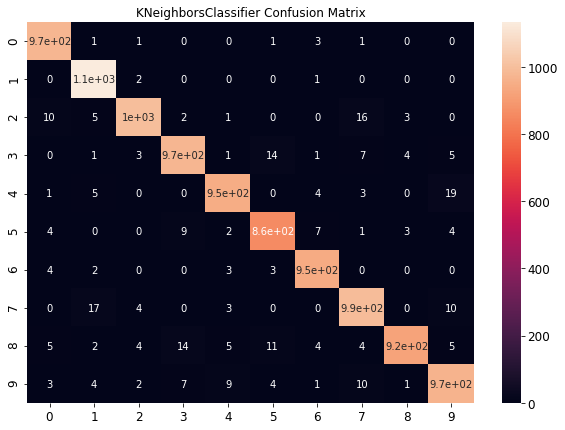

In [14]:
import seaborn as sn
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test, y_pred)

fig = plt.figure(figsize = (10,7))
sn.heatmap(conf_mx, annot=True)
plt.title("KNeighborsClassifier Confusion Matrix")
plt.show()

In [15]:
fig.savefig("images\\Excersie 1 - KNeighborsClassifier Confusion Matrix", bbox_inches='tight')